In [30]:
import json
import logging
from sqlalchemy import Column, Integer, String, Float, DateTime, Boolean, func
from iotfunctions import bif
##import sklearn.external.joblib as extjoblib
import joblib


from iotfunctions.metadata import EntityType
from iotfunctions.db import Database
from iotfunctions.base import BaseTransformer
from iotfunctions.bif import EntityDataGenerator

import datetime as dt
from datetime import datetime

import pandas as pd
import numpy as np

#from watson_machine_learning_client import WatsonMachineLearningAPIClient
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
import sklearn


In [31]:
#from watson_machine_learning_client import WatsonMachineLearningAPIClient

In [32]:
# set Monitor credentials here and entity type
credentials = {}
with open('credentials_as.json', encoding='utf-8') as F:
    credentials = json.loads(F.read())
db = Database(credentials = credentials)
#db_schema = "public" #  set if you are not using the default
db_schema = "DEMO_MAM" #  set if you are not using the default
entity_type = 'pump_agupta_v1_LI'
entity_type_id=46


In [43]:
entity_type = 'IOT_PUMP_AGUPTA_V1_LI'
entity_type_id = 46
entity_name = '04714B6037F8'
a_df = r_df.loc[r_df['device_id'] == entity_name, :]
print ('a_df.shape 1')
print (a_df.shape)
print (a_df)

a_df.shape 1
(66124, 11)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
#Read original pin data
table_name= "IOT_PUMP_AGUPTA_V1_LI"
df = db.read_table(table_name=table_name, schema=db_schema)
print(df.describe())

          voltage       POWER         flow        head     CURRENT  \
count  418.000000  418.000000  418.000000   418.000000  418.000000   
mean   432.007177  18.617160   1231.355488  60.339888   32.465311    
std    3.469973    0.250508    4.669785     0.766680    0.254297     
min    424.000000  18.003000   1219.098000  58.747000   31.890000    
25%    429.000000  18.377500   1227.917750  59.618750   32.290000    
50%    433.000000  18.684500   1231.540500  60.567500   32.465000    
75%    434.000000  18.800500   1234.864000  60.889000   32.617500    
max    436.000000  19.092000   1243.283000  61.542000   33.190000    

             speed  
count  418.000000   
mean   1133.777512  
std    5.865869     
min    1121.000000  
25%    1128.000000  
50%    1136.000000  
75%    1138.000000  
max    1143.000000  


In [36]:
# "Drop Duplicates")
print(df.info)
df.drop_duplicates()
print(df.info)

<bound method DataFrame.info of      voltage   POWER pump_mode           evt_timestamp      flow    head  \
0    434.0    18.769  a        2020-01-20 14:00:01.070  1237.958  60.609   
1    434.0    18.668  a        2020-01-20 14:05:00.980  1229.534  60.543   
2    434.0    18.742  a        2020-01-20 14:10:01.200  1229.134  60.817   
3    433.0    18.682  a        2020-01-20 14:15:01.110  1233.697  60.478   
4    433.0    18.696  a        2020-01-20 14:20:01.140  1228.706  60.694   
5    436.0    18.782  a        2020-01-20 22:50:03.300  1233.056  60.857   
6    433.0    18.650  a        2020-01-20 22:55:03.260  1225.785  60.400   
7    434.0    18.637  a        2020-01-20 23:00:03.230  1239.029  60.385   
8    433.0    18.640  a        2020-01-20 23:05:03.190  1232.034  60.483   
9    433.0    18.667  a        2020-01-20 23:10:03.300  1238.068  60.276   
10   434.0    18.683  a        2020-01-21 00:55:03.800  1221.896  60.754   
11   433.0    18.652  a        2020-01-21 01:00:03.630  

In [37]:
print(df['rcv_timestamp_utc'])

0     2021-10-27 13:10:10
1     2021-10-27 13:10:20
2     2021-10-27 13:10:30
3     2021-10-27 13:10:40
4     2021-10-27 13:10:50
5     2021-10-27 13:27:51
6     2021-10-27 13:28:01
7     2021-10-27 13:28:11
8     2021-10-27 13:28:22
9     2021-10-27 13:28:31
10    2021-10-27 13:32:02
11    2021-10-27 13:32:12
12    2021-10-27 13:32:22
13    2021-10-27 13:32:32
14    2021-10-27 13:32:42
15    2021-10-27 13:34:33
16    2021-10-27 13:34:42
17    2021-10-27 13:34:53
18    2021-10-27 13:35:03
19    2021-10-27 13:35:12
20    2021-10-27 13:37:52
21    2021-10-27 13:38:02
22    2021-10-27 13:38:12
23    2021-10-27 13:38:22
24    2021-10-27 13:38:33
25    2021-10-27 13:40:23
26    2021-10-27 13:40:33
27    2021-10-27 13:40:43
28    2021-10-27 13:40:53
29    2021-10-27 13:41:03
30    2021-10-27 13:08:30
31    2021-10-27 13:08:40
32    2021-10-27 13:08:50
33    2021-10-27 13:09:00
34    2021-10-27 13:09:10
35    2021-10-27 13:11:50
36    2021-10-27 13:12:00
37    2021-10-27 13:12:10
38    2021-1

In [44]:
# Only run when you needed to export data to another Monitor Tenant
#df['rcv_timestamp_utc'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])
# df['updated_utc'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3])
df.to_csv('BackupPumpData.csv')

In [45]:
# Start here when you have existing data on local drive
import json
import logging
from sqlalchemy import Column, Integer, String, Float, DateTime, Boolean, func
from iotfunctions import bif
#import sklearn.external.joblib as extjoblib
import joblib


from iotfunctions.metadata import EntityType
from iotfunctions.db import Database
from iotfunctions.base import BaseTransformer
from iotfunctions.bif import EntityDataGenerator

import datetime as dt
from datetime import datetime

import pandas as pd
import numpy as np

#from watson_machine_learning_client import WatsonMachineLearningAPIClient
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
import sklearn

In [46]:
#r_df = pd.read_csv('/Users/carlos.ferreira1ibm.com/ws/predict_delphi/notebooks/Armstrong/data/1096-first-50-hours.csv')
r_df = pd.read_csv('C:\\Users\\a826190\\iot-python_v1\\maximo_autoai\\data\\maximo-auto_ai_pump_data.csv',index_col=False)

In [47]:
print(r_df.describe)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [48]:
print(r_df.describe)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [49]:
for col in r_df.columns:
    print(col)

Unnamed: 0
rcv_timestamp_utc
updated_utc
speed
head
device_id
pump_mode
flow
voltage
POWER
CURRENT


In [50]:
# Build a model for each Entity in the EntityType
entity_type = 'pump_agupta_v1_LI'
entity_type_id = 46
#entity_name = '04714B601096'
entity_name = '04714B6037F8'
a_df = r_df.loc[r_df['device_id'] == entity_name, :]
print ('a_df.shape 1')
print (a_df.shape)
print (a_df)



a_df.shape 1
(66124, 11)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [51]:
#drop_cols= ['Unnamed: 0', 'id',  'head','rcv_timestamp_utc', 'warn','kw_hour', 'alarm', 'TIMESTAMP',
#                'pump_mode', 'devicetype', 'deviceid', 'temperature', 'logicalinterface_id', 'eventtype', 'accel_speed',
#                'format', 'vibrations_xaxis', 'vibrations_yaxis', 'vibrations_zaxis', 
#                'rmsn_z', 'rmsn_x', 'rmsn_y', 'rms_x_avg', 'pwr', 'hw_ver', 'dq', 'fw_ver', 'anomaly_score',
#                'accel_power', 'rms_x', 'rms_y','rms_z', 'VERSION', 'run_qty', 'tag_number', 'design_head', 'perf_option', 
#                'design_flow', 'pts_count', 'serial_number', 'firmware_ver', 'reated_power', 'vibration_n_yaxis', 
#                'vibration_n_xaxis', 'vibration_n_zaxis', 'rated_current', 'rated_speed', 'hardware_ver', 'pts']
drop_cols= ['Unnamed: 0']
ac_df = a_df.drop(columns=drop_cols)
for col in ac_df.columns:
    print(col)

rcv_timestamp_utc
updated_utc
speed
head
device_id
pump_mode
flow
voltage
POWER
CURRENT


In [52]:
# Save the data file for tutorial
ac_df.dropna().to_csv('maximo-auto_ai_pump_data.csv', date_format='%Y-%m-%d.%H:%M:%S.%f')

In [53]:
# Check df for NaN in 'POWER','FLOW', 'SPEED', 'HEAD'
#print(e_df.isnull().values.any())

print(ac_df.describe)
    
# Check each column for NaN
print(ac_df['speed'].isnull().sum())
print(ac_df['flow'].isnull().sum())
print(ac_df['voltage'].isnull().sum())
print(ac_df['CURRENT'].isnull().sum())
print(ac_df['POWER'].isnull().sum())
sc_df = ac_df.dropna()
print("Any Nulls")
print(sc_df.isnull().values.any())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [54]:
sc_df.describe().T

,count,mean,std,min,25%,50%,75%,max
speed,66124.0,1105.739777,73.994242,946.000,1114.00000,1144.000,1153.000,1175.000
head,66124.0,58.850723,7.399369,37.182,58.90050,62.563,63.786,66.554
flow,66124.0,1145.106478,93.031918,907.664,1001.43250,1193.382,1199.033,1295.630
voltage,66124.0,410.949912,43.955319,317.000,419.00000,435.000,438.000,445.000
POWER,66124.0,17.174424,3.154712,11.208,16.18675,18.870,19.191,20.277
CURRENT,66124.0,31.204364,2.629674,25.990,29.65000,32.540,32.900,34.600


In [55]:
# Pick input colums to predict power using   'flow', 'speed', 'head'
model_columns = ['speed', 'flow', 'voltage', 'CURRENT','POWER']
for col in sc_df:
    print(col)

# Separate input  (speed, flow, voltage, current) and output x (what you want to predict which is power)
print ("--- x data ---")

x = sc_df.drop(['POWER', 'device_id', 'updated_utc', 'rcv_timestamp_utc', 'pump_mode', 'head'], axis = 1)

print ( x.head() )
print (x.info())
print("x.shape")
print(x.shape)

print ("--- y data ---")
y = sc_df.filter(['POWER'], axis=1)
print (y.head())
print("y.shape")
print(y.shape)
print( y.info() )

s_df = sc_df.loc[sc_df['device_id'] == entity_name, :][model_columns]

print ('s_df.shape 1')
print (s_df.shape)
print (s_df.describe)

# Check df for NaN
print(s_df.isnull().values.any())
print(s_df['speed'].isnull().sum())
print(s_df['flow'].isnull().sum())
print(s_df['voltage'].isnull().sum())
print(s_df['CURRENT'].isnull().sum())
print(s_df['POWER'].isnull().sum())


print(sc_df.isnull().values.any())

rcv_timestamp_utc
updated_utc
speed
head
device_id
pump_mode
flow
voltage
POWER
CURRENT
--- x data ---
    speed      flow  voltage  CURRENT
0  1156.0  1193.607  438.0    32.76  
1  1156.0  1203.384  438.0    33.10  
2  1154.0  1198.567  431.0    33.26  
3  1160.0  1190.626  438.0    33.16  
4  971.0   989.633   331.0    26.44  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66124 entries, 0 to 66123
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   speed    66124 non-null  float64
 1   flow     66124 non-null  float64
 2   voltage  66124 non-null  float64
 3   CURRENT  66124 non-null  float64
dtypes: float64(4)
memory usage: 2.5 MB
None
x.shape
(66124, 4)
--- y data ---
    POWER
0  19.316
1  19.366
2  19.224
3  19.452
4  11.471
y.shape
(66124, 1)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 66124 entries, 0 to 66123
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [56]:
print(sc_df.describe)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [57]:
# Split data into train and test
from sklearn.model_selection import train_test_split 
#  Assign variables to capture train and test split  output
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

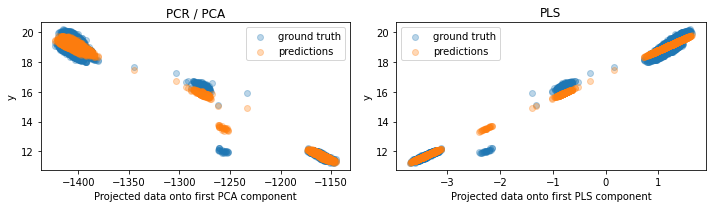

In [58]:
# https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html#sphx-glr-auto-examples-cross-decomposition-plot-pcr-vs-pls-py
# 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
 # Validate you are getting good data for a single asset by plotting data
import matplotlib.pyplot as plt

pcr = make_pipeline(StandardScaler(), PCA(n_components=1), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']  # retrieve the PCA step of the pipeline

pls = PLSRegression(n_components=1)
pls.fit(X_train, y_train)

fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].scatter(pca.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[0].scatter(pca.transform(X_test), pcr.predict(X_test), alpha=.3,
                label='predictions')
axes[0].set(xlabel='Projected data onto first PCA component',
            ylabel='y', title='PCR / PCA')
axes[0].legend()
axes[1].scatter(pls.transform(X_test), y_test, alpha=.3, label='ground truth')
axes[1].scatter(pls.transform(X_test), pls.predict(X_test), alpha=.3,
                label='predictions')
axes[1].set(xlabel='Projected data onto first PLS component',
            ylabel='y', title='PLS')
axes[1].legend()
plt.tight_layout()
plt.show()

In [65]:
# Assess a predictions using ExtraTreesRegressor 
# From Tutorial https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6


# Define the model
#model = ExtraTreesRegressor(n_estimators =1000, min_samples_split =0.5)
extra_trees_model = ExtraTreesRegressor()

print ("y_train")
print (y_train)

# fit the model on the whole dataset
extra_trees_model.fit(X_train, y_train.values.ravel() )

# Predict a single row prediction
#--- x data ---
#       SPEED    FLOW  VOLTAGE  CURRENT  POWER
#0    1053.0  16.294  251.0    7.15     1.556
#131  1071.0  61.006  257.0    7.70     1.950
#132  1077.0  69.099  259.0    7.85     2.024
#133  1082.0  78.005  261.0    7.95     2.148
#134  1085.0  80.894  262.0    8.03     2.154

#--- y data ---
# Test prediction on  a single row prediction
# speed      flow  voltage  CURRENT   POWER
# 1160.0  1190.626    438.0    33.16  19.452
#  971.0   989.633    331.0    26.44  11.471

# Power should be 11.471
row = [[ 971.0,  989.633,  331.0,  26.44]]

yhat = extra_trees_model.predict(row)
print("Power should be 11.471")
print(yhat)

# Predict entire training set
x_pos_predictions = extra_trees_model.predict(X_test)

print("Predictions")
print ( x_pos_predictions )
print( x_pos_predictions.shape)

# Add the prediction to the dataframe
#s_df['predict_x1_position'] = x_pos_predictions 

y_train
        POWER
46846  19.604
65155  18.436
52150  19.294
28705  18.494
61397  18.443
24195  12.068
41823  19.299
50502  19.422
48771  19.396
16073  16.469
49121  19.561
65097  18.757
2687   18.681
4315   18.925
27612  18.860
51809  19.418
48677  19.463
30553  18.698
38895  19.330
28681  18.584
18397  11.857
29142  18.635
57974  18.874
14170  11.545
13983  11.578
34687  19.261
12894  11.534
504    18.613
57934  18.877
57650  18.986
56711  18.872
37723  19.304
64578  18.705
58559  18.655
3555   18.966
39399  19.324
21701  11.833
33237  18.597
25133  11.918
10465  11.508
6082   18.909
48954  19.383
46836  19.676
304    18.879
12684  11.670
4518   19.015
11988  11.659
9398   11.564
11511  11.710
15599  11.388
2186   18.924
42439  19.249
10820  11.637
47089  19.420
59746  18.766
62349  18.937
6705   18.897
38474  19.242
13964  11.592
10755  11.594
46753  19.730
31434  18.993
11644  11.527
20214  11.996
56748  18.966
64901  18.547
8540   18.935
28935  18.481
32192  18.818
56391  19.08

Power should be 11.471
[11.5335]
Predictions
[19.26136 18.82657 18.59703 ... 19.27209 18.97651 18.87745]
(13225,)


In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13225 entries, 39488 to 4779
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   speed    13225 non-null  float64
 1   flow     13225 non-null  float64
 2   voltage  13225 non-null  float64
 3   CURRENT  13225 non-null  float64
dtypes: float64(4)
memory usage: 516.6 KB


Score: 0.9998023418337852


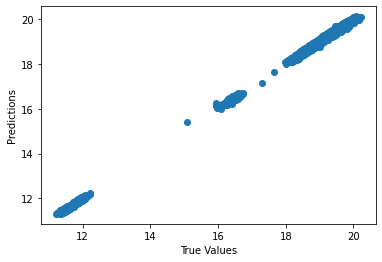

In [67]:
## Plot the prediction The line / model
plt.scatter(y_test, x_pos_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print('Score:', extra_trees_model.score(X_test, y_test) )

In [68]:
# Import metrics library
from sklearn import metrics
print("MAE")
print(metrics.mean_absolute_error(y_test, x_pos_predictions))
print("MSE")
print(metrics.mean_squared_error(y_test, x_pos_predictions))
print("RMSE")
print(np.sqrt(metrics.mean_squared_error(y_test, x_pos_predictions)))

MAE
0.03431458865784488
MSE
0.001966373986017008
RMSE
0.0443438156456682


In [69]:
# Check df for NaN
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
columns = [ 'speed','flow','voltage','CURRENT','POWER', 'device_id','updated_utc']
s_df = ac_df.loc[ac_df['device_id'] == entity_name, :][columns]

print ("s_df.shape")
print (s_df.shape)
s_df.head()

c:\users\a826190\iot-python_v1\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


s_df.shape
(66124, 7)


,speed,flow,voltage,CURRENT,POWER,device_id,updated_utc
0,1156.0,1193.607,438.0,32.76,19.316,04714B6037F8,2020-08-30 13:35:15.000
1,1156.0,1203.384,438.0,33.10,19.366,04714B6037F8,2020-08-30 13:55:15.000
2,1154.0,1198.567,431.0,33.26,19.224,04714B6037F8,2020-12-02 14:43:18.000
3,1160.0,1190.626,438.0,33.16,19.452,04714B6037F8,2020-10-13 12:58:20.000
4,971.0,989.633,331.0,26.44,11.471,04714B6037F8,2020-04-24 16:59:26.000


In [80]:
# save the model to disk
import pickle
model_name = 'pump_co_power_extra_trees_model_ot.mod'
model_file_path = 'C:\\Users\\a826190\\iot-python_v1\\maximo_autoai\\models\\' + model_name
print(model_file_path)
pickle.dump(extra_trees_model, open(model_file_path, 'wb'))

# Load the model from disk
model = pickle.load(open(model_file_path, 'rb'))
print(model)

# Test prediction on  a single row prediction
# speed      flow  voltage  CURRENT   POWER
# 1160.0  1190.626    438.0    33.16  19.452
#  971.0   989.633    331.0    26.44  11.471

# Power should be 19.452
row = [[1160.0, 1190.626, 438.0, 33.16]]

yhat = model.predict(row)
print(yhat)

C:\Users\a826190\iot-python_v1\maximo_autoai\models\pump_co_power_extra_trees_model_ot.mod
ExtraTreesRegressor()
[19.452]


In [81]:
# Get Connection to DB to save and retreive models
from iotfunctions.db import Database
import json
credentials = {}
credential_file = 'credentials_as.json'

with open(credential_file, encoding='utf-8') as F:
    credentials = json.loads(F.read())
db_ctp = Database(credentials=credentials, entity_type_id=entity_type_id )
print(entity_type_id)
print (db_ctp.tenant_id)


# Store the model with Datetimestamp and vector to DB db_ctp
from datetime import datetime
#model_name = 'pump_co_power_extra_trees_model_agupta_v1.mod'
model_name = 'pump_co_power_extra_trees_model_ot.mod'
try:
    feature_vector = ['speed', 'flow', 'voltage', 'CURRENT' ]
    model_dict  = {
    'model': model,
    'feature_vector': feature_vector,
    'timesstamp' : datetime.now().strftime("%Y%m%d%H%M%S")
    }
    db_ctp.model_store.store_model(model_name, model_dict) 
    print("Saved Model %s" %model_name)
except Exception as e:
    print('Model store failed with ' + str(e))
    pass


# Retrieve the model from db
try:
    model_dict = db_ctp.model_store.retrieve_model(model_name)
    print('load model')
    monitor_model = model_dict['model']
    print(monitor_model)
    feature_vector = model_dict['feature_vector']
    print(feature_vector)
    feature_vector = model_dict['timesstamp']
    print(feature_vector)
except Exception as e:
    print('Model retrieval failed with ' + str(e))
    pass

46
demo
Saved Model pump_co_power_extra_trees_model_ot.mod
load model
ExtraTreesRegressor()
['speed', 'flow', 'voltage', 'CURRENT']
20211028133343


In [82]:
# Test prediction on  a single row prediction
# speed      flow  voltage  CURRENT   POWER
# 1160.0  1190.626    438.0    33.16  19.452
#  971.0   989.633    331.0    26.44  11.471

# Power should be 19.452
row = [[1160.0, 1190.626, 438.0, 33.16]]

yhat = monitor_model.predict(row)
print(yhat)

[19.452]


In [75]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Sort the dataframe by updated_utc
d_df = sc_df
d_df['datetime'] = pd.to_datetime(d_df['updated_utc'])
d_df = d_df.set_index('datetime')
#d_df.drop(['updated_utc'], axis=1, inplace=True)

d_df.head()



,rcv_timestamp_utc,updated_utc,speed,head,device_id,pump_mode,flow,voltage,POWER,CURRENT
datetime,,,,,,,,,,
2020-08-30 13:35:15,2020-08-30 13:35:15.849,2020-08-30 13:35:15.000,1156.0,63.958,04714B6037F8,a,1193.607,438.0,19.316,32.76
2020-08-30 13:55:15,2020-08-30 13:55:15.950,2020-08-30 13:55:15.000,1156.0,64.075,04714B6037F8,a,1203.384,438.0,19.366,33.10
2020-12-02 14:43:18,2020-12-02 14:43:18.176,2020-12-02 14:43:18.000,1154.0,63.882,04714B6037F8,a,1198.567,431.0,19.224,33.26
2020-10-13 12:58:20,2020-10-13 12:58:20.934,2020-10-13 12:58:20.000,1160.0,64.694,04714B6037F8,a,1190.626,438.0,19.452,33.16
2020-04-24 16:59:26,2020-04-24 16:59:26.481,2020-04-24 16:59:26.000,971.0,45.394,04714B6037F8,a,989.633,331.0,11.471,26.44


In [76]:
print(d_df.index)
print(d_df.tail(10))

DatetimeIndex(['2020-08-30 13:35:15', '2020-08-30 13:55:15',
               '2020-12-02 14:43:18', '2020-10-13 12:58:20',
               '2020-04-24 16:59:26', '2020-04-24 17:04:26',
               '2020-04-24 17:09:26', '2020-04-24 17:19:26',
               '2020-04-24 17:14:26', '2020-04-24 17:24:26',
               ...
               '2021-01-30 14:46:10', '2021-01-30 14:51:10',
               '2021-01-30 15:31:10', '2021-01-30 15:36:10',
               '2021-01-30 14:01:10', '2021-01-30 14:06:10',
               '2021-01-30 14:11:09', '2021-01-30 15:41:10',
               '2021-01-30 15:46:10', '2021-01-30 15:51:10'],
              dtype='datetime64[ns]', name='datetime', length=66124, freq=None)
                           rcv_timestamp_utc              updated_utc   speed  \
datetime                                                                        
2021-01-30 14:46:10  2021-01-30 14:46:10.125  2021-01-30 14:46:10.000  1149.0   
2021-01-30 14:51:10  2021-01-30 14:51:10.147  2

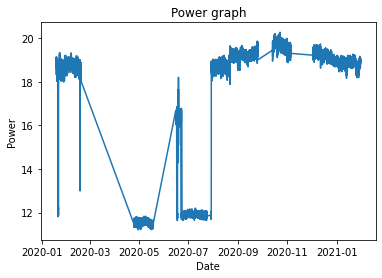

In [77]:
plt.xlabel("Date")
plt.ylabel("Power")
plt.title("Power graph")
plt.plot(d_df.sort_values(by='datetime',ascending=True)['POWER'])

In [78]:
#Select rows = or less than 0 and drop them
print(d_df.loc[d_df.POWER <= 0])


Empty DataFrame
Columns: [rcv_timestamp_utc, updated_utc, speed, head, device_id, pump_mode, flow, voltage, POWER, CURRENT]
Index: []


c:\users\a826190\iot-python_v1\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  This is separate from the ipykernel package so we can avoid doing imports until


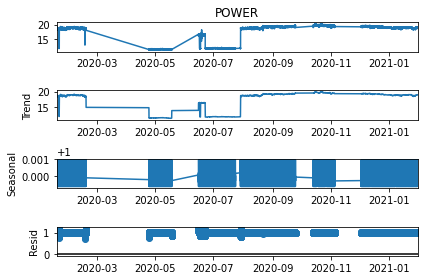

In [79]:
from statsmodels.tsa.seasonal import seasonal_decompose
d_df = d_df.dropna()
result = seasonal_decompose(d_df[d_df.POWER > 0] .sort_values(by='datetime',ascending=True)['POWER'], model='multiplicative', freq=60)
result.plot()
plt.show()